# PII Detection on Collection - MSFT Presidio Example
The following is an example of how to use the PIIAnalysisService with the default MSFT presidio analyzer on a large set of PII.

> Note: This notebook requires all dependencies to have been installed. For more information, review readme.


In [5]:
from pii_codex.models.common import AnalysisProviderType
from pii_codex.services.analysis_service import PIIAnalysisService
import pandas as pd

pii_analysis_service = PIIAnalysisService()

# Run the detection and assessments in one shot with the PIIAnalysisService
analysis_results = pii_analysis_service.analyze_collection(
    analysis_provider=AnalysisProviderType.PRESIDIO.name,
    texts=[
        "How can I reach you, Jim?",
        "Here is my contact information: Phone number 555-555-5555 and my email is example123@email.com",
        "Perfect, my number if you need me is 777-777=7777. Where is the residence and what is the earliest the crew can arrive?",
        "I'll be at my home at 123 Dark Data Lane, OH, 11111 after 7PM",
        "Cool, I'll be there!"
        ],
    language_code="en",
    collection_type="population",
    collection_name="PII Collection 1"
)

results = analysis_results.to_dict()
results

{'collection_name': 'PII Collection 1',
 'collection_type': 'POPULATION',
 'analyses': [{'analysis': [{'pii_type_detected': 'PERSON',
     'risk_level': 3,
     'risk_level_definition': 'Identifiable',
     'cluster_membership_type': 'Financial Information',
     'hipaa_category': 'Protected Health Information',
     'dhs_category': 'Linkable',
     'nist_category': 'Directly PII',
     'entity_type': 'PERSON',
     'score': 0.85,
     'start': 21,
     'end': 24}],
   'index': 0,
   'risk_score_mean': 3},
  {'analysis': [{'pii_type_detected': 'EMAIL_ADDRESS',
     'risk_level': 3,
     'risk_level_definition': 'Identifiable',
     'cluster_membership_type': 'Personal Preferences',
     'hipaa_category': 'Protected Health Information',
     'dhs_category': 'Stand Alone PII',
     'nist_category': 'Directly PII',
     'entity_type': 'EMAIL_ADDRESS',
     'score': 1.0,
     'start': 74,
     'end': 94},
    {'pii_type_detected': 'PHONE_NUMBER',
     'risk_level': 3,
     'risk_level_defi

In [6]:
# Peering into each and every analysis in collection
data = results.copy()
del data['analyses']

analyses_collection_df = pd.DataFrame(
    [data]
)

analyses_collection_df

,collection_name,collection_type,detection_count,risk_scores,risk_score_mean,risk_score_mode,risk_score_median,risk_score_standard_deviation,risk_score_variance,detected_pii_types,detected_pii_type_frequencies
0,PII Collection 1,POPULATION,5,"[3, 2.6666666666666665, 1, 2, 1]",1.933333,1,2,0.827312,0.684444,"[EMAIL_ADDRESS, PHONE_NUMBER, URL, PERSON, LOC...","{'PERSON': 1, 'EMAIL_ADDRESS': 1, 'PHONE_NUMBE..."


In [7]:
analyses_collection_df[
    ['detection_count',
     'risk_scores',
     'risk_score_mean',
     'risk_score_variance',
     'risk_score_standard_deviation',
     'risk_score_mode',
     'risk_score_median']
]
analyses_collection_df.T

,0
collection_name,PII Collection 1
collection_type,POPULATION
detection_count,5
risk_scores,"[3, 2.6666666666666665, 1, 2, 1]"
risk_score_mean,1.933333
risk_score_mode,1
risk_score_median,2
risk_score_standard_deviation,0.827312
risk_score_variance,0.684444
detected_pii_types,"[EMAIL_ADDRESS, PHONE_NUMBER, URL, PERSON, LOC..."


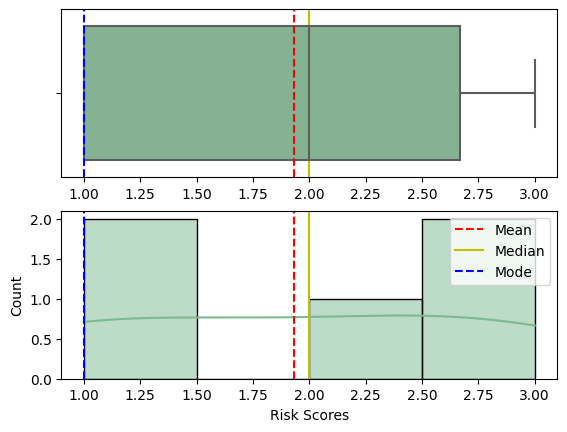

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_palette(sns.color_palette("crest"))

df = pd.DataFrame({"Risk Scores":analyses_collection_df.risk_scores.item()})

f, (ax_box, ax_hist) = plt.subplots(2)
mean=analyses_collection_df['risk_score_mean'].mean()
median=analyses_collection_df['risk_score_median'].median()
mode=analyses_collection_df['risk_score_mode'].mode().values[0]

sns.boxplot(data=df, x="Risk Scores", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='--')

sns.histplot(data=df, x="Risk Scores", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='y', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='--', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()